In [1]:
import matplotlib.pyplot as plt
import torchvision as tv
from torchvision import transforms, utils


import torch.nn.functional as F
import torch 
import torch.nn as nn
from torch.autograd import Variable
import torchvision.models as models
# from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader
# from PIL import Image
# import numpy as np
import torch.optim as optim
# import os
import time

import loadData

In [2]:
device = torch.device("cuda:1")

In [3]:
# 日志记录模块2
import logging
logger = logging.getLogger(__name__)
logger.setLevel(level = logging.INFO)
handler = logging.FileHandler("./FFT30dB-all.txt")
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

console = logging.StreamHandler()
console.setLevel(logging.INFO)

logger.addHandler(handler)
logger.addHandler(console)

In [4]:
startTime = time.time()

In [5]:
transforms = tv.transforms.Compose([
    transforms.ToTensor(),
])


numOfBatch = 9
pixel = 64
flag = 0
root = f'./{numOfBatch}/data'
batchSize = 4
train_data = loadData.MyDataset(txt=f'files_train.txt', transform=None)
test_data = loadData.MyDataset(txt=f'files_test.txt', transform=None)


train_loader = DataLoader(dataset=train_data, batch_size=batchSize, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_data, batch_size=batchSize, shuffle=True, num_workers=2)


print(train_loader)
print(test_loader)

In [6]:
print(len(train_data))
print(len(test_loader))

1026
81


In [7]:
data = iter(train_loader)

# print(type(data))
# print(len(data))
data_, label = data.next()
print(train_loader.batch_size)
print(data_.shape)
# print(label)
# print(data_, label)

4
torch.Size([4, 1, 80, 1])


In [8]:
# x = torch.randn(4, 1, 80, 1).float()
# conv = nn.Conv2d(in_channels = 1, out_channels = 4, kernel_size = (5, 1))
# x = conv(x)
# x.shape
# conv2 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3, 2))
# x = conv2(x)
# x.shape


In [9]:
# 256*1189

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 4, kernel_size = (7, 1))
#         conv = nn.Conv2d(in_channels = 1, out_channels = 128, kernel_size = (10, 1))

        self.conv2 = nn.Conv2d(in_channels = 4, out_channels = 8, kernel_size = (3, 1))
        
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)
        
        self.fc1 = nn.Linear(576, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 54)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 1)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 1)
    
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [11]:
# TensorBoard
# from tensorboardX import SummaryWriter
# net = Net()
# # writer = SummaryWriter('writer928') #建立一个保存数据用的东西
# dummy_input = torch.rand(2,160,400)  # 假设输入20张1*28*28的图片
# with SummaryWriter(comment='Net1') as w:
#     w.add_graph(net, (dummy_input,))

In [12]:
net = Net()

net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=net.parameters(), lr=0.0001, momentum=0.9)

epochs = 600
average_loss_series = []

In [13]:
for a, b in enumerate(train_loader):
    inputs, labels = b
    print(inputs.shape)
    break

torch.Size([4, 1, 80, 1])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
[1, 20] loss: 4.016097593307495
设备号为: tensor([47,  2, 48,  1], device='cuda:1')，预测的设备号为:tensor([ 1, 42, 28, 28], device='cuda:1')
[1, 20] acc: 0.02500000037252903
[1, 40] loss: 4.012459182739258
设备号为: tensor([ 8, 35, 36, 25], device='cuda:1')，预测的设备号为:tensor([27, 27, 28, 27], device='cuda:1')
[1, 40] acc: 0.012500000186264515
[1, 60] loss: 3.8842407345771788
设备号为: tensor([30, 17, 36, 22], device='cuda:1')，预测的设备号为:tensor([28, 28, 28, 28], device='cuda:1')
[1, 60] acc: 0.02500000037252903
[1, 80] loss: 4.016773843765259
设备号为: tensor([ 7, 23, 11, 44], device='cuda:1')，预测的设备号为:tensor([27, 42, 27, 28], device='cuda:1')
[1, 80] acc: 0.0
[1, 100] loss: 3.9884491205215453
设备号为: tensor([50, 33, 37, 35], device='cuda:1')，预测的设备号为:tensor([17,

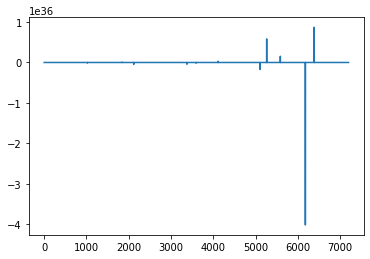

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
设备号为: tensor([ 6,  1, 45, 49], device='cuda:1')，模型训练后得到的设备号为:tensor([ 6,  1, 53, 18], device='cuda:1')
目前一共测试了4组，预测成功的一共有2组
设备号为: tensor([54, 52, 28, 39], device='cuda:1')，模型训练后得到的设备号为:tensor([45, 29, 28, 39], device='cuda:1')
目前一共测试了8组，预测成功的一共有4组
设备号为: tensor([47, 45, 14,  9], device='cuda:1')，模型训练后得到的设备号为:tensor([47, 45, 14,  9], device='cuda:1')
目前一共测试了12组，预测成功的一共有8组
设备号为: tensor([49, 45, 22, 53], device='cuda:1')，模型训练后得到的设备号为:tensor([49, 53, 52, 53], device='cuda:1')
目前一共测试了16组，预测成功的一共有10组
设备号为: tensor([29, 42, 39, 50], device='cuda:1')，模型训练后得到的设备号为:tensor([29, 42, 34, 50], device='cuda:1')
目前一共测试了20组，预测成功的一共有13组
设备号为: tensor([40, 42, 36, 24], device='cuda:1')，模型训练后得到的设备号为:tensor([ 4, 19, 36, 24], device='cuda:1')
目前一共测试了24组，

In [14]:
%matplotlib inline


if __name__ == '__main__':
    for epoch in range(epochs):
        running_loss = 0.0
        running_acc = 0.0

        for i, data in enumerate(train_loader):
#             print("i:", i )
#             print("data: ", data[0])
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

#             inputs = inputs.permute(0, 2, 1)
            
            inputs = torch.tensor(inputs, dtype=torch.float32, device = device)

            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, dim=1)
            total = labels.size(0)
#             print('原来的值:{0}, 预测的值:{1}'.format(labels, predicted))
            running_correct = (predicted == labels).sum()
            running_acc += running_correct
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()

            # 每loopNum个batch打印一次训练状态
            loopNum = 20
            if i % loopNum == loopNum - 1:
                average_loss = running_loss / loopNum
                logger.info('[{0}, {1}] loss: {2}'.format(epoch + 1, i + 1, average_loss))
                logger.info('设备号为: {0}，预测的设备号为:{1}'.format(labels, predicted))
#                 logger.info(torch.cuda.current_device ())
                running_acc = running_acc.float()
                average_acc = running_acc / loopNum / total
                
                logger.info('[{0}, {1}] acc: {2}'.format(epoch + 1, i + 1, average_acc))
                average_loss_series.append(average_loss)
                running_loss = 0.0
                running_acc = 0.0
        if epoch == 78:
            torch.save(net, f'/workspace/DATASET/model_78.pkl')

    x = range(0, len(average_loss_series))
    plt.figure()
    plt.plot(x, average_loss_series)
#     plt.savefig("Loss.png")
    plt.savefig("Loss.png", bbox_inches="tight")
    plt.show()
    

    # %%
    # 在测试集上测试
    realLabel = []
    predictedLabel = []

    def correct_rate(net, testloader):
        correct = 0.0
        total = 0.0
        count = 0
        correctpredict = 0

        for data in testloader:
            images, labels = data
            images, labels = images.to(device),labels.to(device)
            realLabel.append([int(label) for label in labels])
    
            tests = torch.tensor(images, dtype=torch.float32,device=device)
            outputs = net(tests)

            _, predicted = torch.max(outputs.data, dim=1)
            logger.info('设备号为: {0}，模型训练后得到的设备号为:{1}'.format(labels, predicted))
#             deviceNumber = torch.cuda.current_device ()
#             logger.info(deviceNumber)
            
            labelsn = labels.cpu().numpy()
            pn = predicted.cpu().numpy()
            count += len(labelsn)
            
            for i in range(len(labelsn)):
                if labelsn[i] == pn[i]:
                    correctpredict += 1
                
            
            logger.info('目前一共测试了{0}组，预测成功的一共有{1}组'.format(count, correctpredict))
            predictedLabel.append([int(label) for label in predicted])
            
            total += labels.size(0)
            correct += (predicted == labels).sum()

            
        logger.info("total的值为：{total}")
#         return 100 * correct  # / total
        return 100 * correct/ total 


    correct = correct_rate(net, test_loader)
    logger.info(f'{len(test_loader) * 3}张测试集中准确率为： {correct}%')

    # %%
    import itertools
    from sklearn.metrics import confusion_matrix

    realLabel = list(itertools.chain.from_iterable(realLabel))
    predictedLabel = list(itertools.chain.from_iterable(predictedLabel))

    cm = confusion_matrix(realLabel, predictedLabel)
    logger.info(cm)

#     logger.info('the running time is:{1}'.format(time.time() - startTime))
    torch.save(net, f'/workspace/PytorchCnn/models/model_{epoch}_{pixel}_{flag}.pkl')
    

In [15]:
torch.cuda.current_device ()

0

In [16]:
aa = iter(train_loader)
a, b = aa.next()
print(a[0].shape)
print(a)

torch.Size([1, 80, 1])
tensor([[[[-4.0716e-01],
          [ 1.0419e-01],
          [-3.6279e-02],
          [ 9.0961e-02],
          [ 2.5757e-01],
          [-7.2225e-02],
          [ 2.3035e-01],
          [-7.4012e-02],
          [ 2.4130e-01],
          [-2.1192e-02],
          [-1.0247e-01],
          [-2.6307e-01],
          [-1.2878e-02],
          [-1.9497e-01],
          [ 5.7175e-01],
          [ 4.8626e-02],
          [-3.5831e-01],
          [ 1.6583e-01],
          [-1.1556e-01],
          [-4.5627e-01],
          [-1.6867e+00],
          [ 1.3720e+00],
          [-6.9893e-01],
          [ 7.2392e-01],
          [-2.4918e+00],
          [ 1.2814e+00],
          [ 5.3405e-01],
          [-1.2239e+00],
          [-3.3709e+00],
          [-4.0981e+00],
          [ 1.7600e+00],
          [-5.3259e+00],
          [-6.4049e+00],
          [-2.0330e+00],
          [-5.3808e+00],
          [-4.8673e+00],
          [-2.5725e+01],
          [ 1.6495e+01],
          [-3.3082e+00],
  

In [17]:
input = torch.randn(20, 16, 50, 100)
input.shape

torch.Size([20, 16, 50, 100])

In [18]:
m2=nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2))
inpu1=Variable(torch.randn(20,16,50,100))
print(inpu1.shape)
output=m2(inpu1)
print(output.shape)

torch.Size([20, 16, 50, 100])
torch.Size([20, 33, 28, 100])


In [19]:
total

2

In [20]:
torch.cuda.current_device () 

0

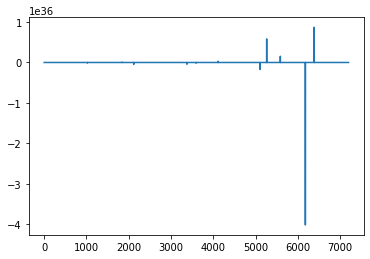

In [21]:
x = range(0, len(average_loss_series))
plt.figure()
plt.plot(x, average_loss_series)
plt.savefig("Loss1.png", bbox_inches="tight")
plt.show()